In [176]:
# 1
import pandas as pd
import numpy as np

data=pd.read_csv('student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [177]:
# 성별별로 데이터 분리
data_m=data[data['sex']=='M']
data_w=data[data['sex']=='F']

# 성별별 기말고사 점수 평균 계산
print('남학생 평균:',data_m["G3"].mean())
print('여학생 평균:',data_w["G3"].mean())

# 0점을 받은 학생은 결측치로 판단, 제거하고 평균을 계산
print('남학생 평균(0점 제거):',data_m[data_m["G3"]>0]["G3"].mean())
print('여학생 평균(0점 제거):',data_f[data_f["G3"]>0]["G3"].mean())

남학생 평균: 10.914438502673796
여학생 평균: 9.966346153846153
남학생 평균(0점 제거): 11.866279069767442
여학생 평균(0점 제거): 11.205405405405406


In [179]:
# 성별별 기말고사 점수를 추출
g3_m=data_m[data_m["G3"]>0]["G3"]
g3_w=data_f[data_f["G3"]>0]["G3"]

정규성을 가진다고 보기에는 어려워 보입니다.


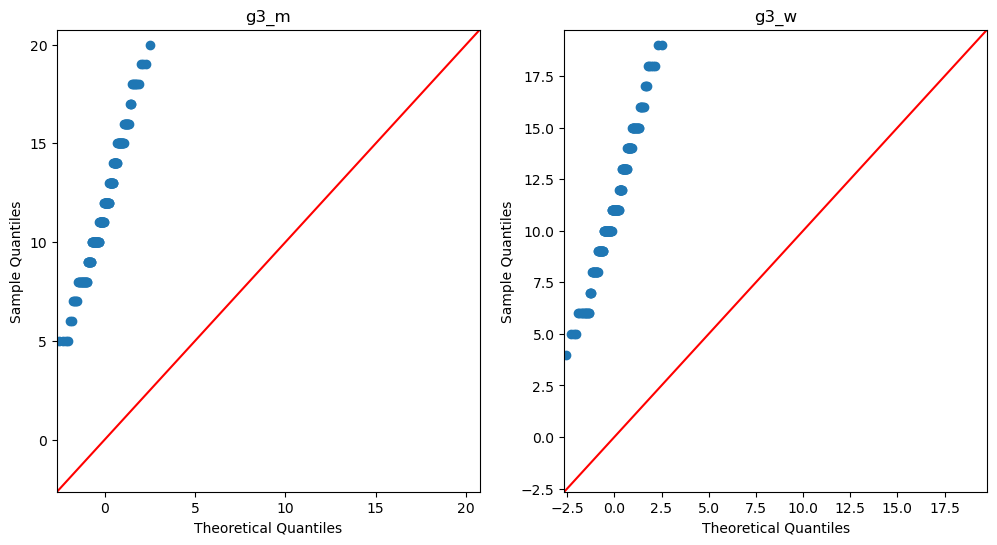

In [182]:
# Q-Q plot을 통해 데이터가 정규성을 따르는지 시각적으로 확인

import matplotlib.pyplot as plt
import statsmodels.api as sm

fig,axes=plt.subplots(1,2,figsize=(12, 6))

sm.qqplot(g3_m, line='45', ax=axes[0])
axes[0].set_title('g3_m')
sm.qqplot(g3_w, line='45', ax=axes[1])
axes[1].set_title('g3_w')

print('정규성을 가진다고 보기에는 어려워 보입니다.')

In [183]:
# 데이터가 정규성을 따르는지 Shapiro-Wilk Test를 통해 수치적으로 확인
from scipy.stats import shapiro

_,p_m=shapiro(g3_m)
_,p_w=shapiro(g3_w)

print('[남학생의 기말고사 점수]')
print('shapiro test의 p-value:',p_m)
if(p_m<0.05): print('cut-off 0.05에서 정규성을 따르지 않는다고 볼 수 있습니다.')
else: print('cut-off 0.05에서 정규성을 따른다고 볼 수 있습니다.')
    
print()

print('[여학생의 기말고사 점수]')
print('shapiro test의 p-value:',p_w)
if(p_w<0.05): print('cut-off 0.05에서 정규성을 따르지 않는다고 볼 수 있습니다.')
else: print('cut-off 0.05에서 정규성을 따른다고 볼 수 있습니다.')

[남학생의 기말고사 점수]
shapiro test의 p-value: 0.009935521520674229
cut-off 0.05에서 정규성을 따르지 않는다고 볼 수 있습니다.

[여학생의 기말고사 점수]
shapiro test의 p-value: 0.006041768938302994
cut-off 0.05에서 정규성을 따르지 않는다고 볼 수 있습니다.


In [184]:
# 데이터가 정규성을 따르지 않으므로 비모수적 방법인 rank-sum test를
# 통해 남,녀의 수학 기말고사 점수가 차이가 나는지 test
from scipy.stats import ranksums

_,p=ranksums(g3_m,g3_w)
print('rank-sum test의 p-value:',p)
if(p<0.05): print('cut-off 0.05에서 남,녀의 수학 기말고사 점수의 차이가 있다고 볼 수 있습니다.')
else: print('cut-off 0.05에서 남,녀의 수학 기말고사 점수의 차이가 있다고 보기는 어렵습니다.')

rank-sum test의 p-value: 0.077593485676993
cut-off 0.05에서 남,녀의 수학 기말고사 점수의 차이가 있다고 보기는 어렵습니다.


In [185]:
# 2
data=pd.read_csv('student-por.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [186]:
# 성별별로 데이터 분리
data_m=data[data['sex']=='M']
data_w=data[data['sex']=='F']

# 성별별 기말고사 점수 평균 계산
print('남학생 평균:',data_m["G3"].mean())
print('여학생 평균:',data_w["G3"].mean())

# 0점을 받은 학생은 결측치로 판단, 제거하고 평균을 계산
print('남학생 평균(0점 제거):',data_m[data_m["G3"]>0]["G3"].mean())
print('여학생 평균(0점 제거):',data_f[data_f["G3"]>0]["G3"].mean())

남학생 평균: 11.406015037593985
여학생 평균: 12.2532637075718
남학생 평균(0점 제거): 11.75968992248062
여학생 평균(0점 제거): 11.205405405405406


In [187]:
# 성별별 기말고사 점수를 추출
g3_m=data_m[data_m["G3"]>0]["G3"]
g3_w=data_f[data_f["G3"]>0]["G3"]

정규성을 가진다고 보기에는 어려워 보입니다.


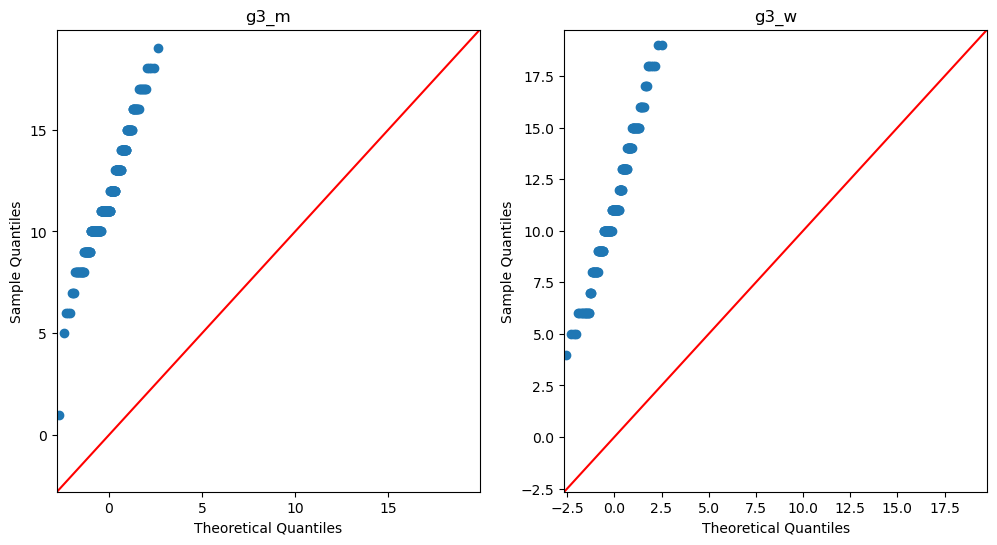

In [188]:
# Q-Q plot을 통해 데이터가 정규성을 따르는지 시각적으로 확인

import matplotlib.pyplot as plt
import statsmodels.api as sm

fig,axes=plt.subplots(1,2,figsize=(12, 6))

sm.qqplot(g3_m, line='45', ax=axes[0])
axes[0].set_title('g3_m')
sm.qqplot(g3_w, line='45', ax=axes[1])
axes[1].set_title('g3_w')

print('정규성을 가진다고 보기에는 어려워 보입니다.')

In [189]:
# 데이터가 정규성을 따르는지 Shapiro-Wilk Test를 통해 수치적으로 확인
from scipy.stats import shapiro

_,p_m=shapiro(g3_m)
_,p_w=shapiro(g3_w)

print('[남학생의 기말고사 점수]')
print('shapiro test의 p-value:',p_m)
if(p_m<0.05): print('cut-off 0.05에서 정규성을 따르지 않는다고 볼 수 있습니다.')
else: print('cut-off 0.05에서 정규성을 따른다고 볼 수 있습니다.')
    
print()

print('[여학생의 기말고사 점수]')
print('shapiro test의 p-value:',p_w)
if(p_w<0.05): print('cut-off 0.05에서 정규성을 따르지 않는다고 볼 수 있습니다.')
else: print('cut-off 0.05에서 정규성을 따른다고 볼 수 있습니다.')

[남학생의 기말고사 점수]
shapiro test의 p-value: 4.664006701204926e-05
cut-off 0.05에서 정규성을 따르지 않는다고 볼 수 있습니다.

[여학생의 기말고사 점수]
shapiro test의 p-value: 0.006041768938302994
cut-off 0.05에서 정규성을 따르지 않는다고 볼 수 있습니다.


In [190]:
# 데이터가 정규성을 따르지 않으므로 비모수적 방법인 rank-sum test를
# 통해 남,녀의 수학 기말고사 점수가 차이가 나는지 test
from scipy.stats import ranksums

_,p=ranksums(g3_m,g3_w)
print('rank-sum test의 p-value:',p)
if(p<0.05): print('cut-off 0.05에서 남,녀의 포르투갈어 기말고사 점수의 차이가 있다고 볼 수 있습니다.')
else: print('cut-off 0.05에서 남,녀의 포르투갈어 기말고사 점수의 차이가 있다고 보기는 어렵습니다.')

rank-sum test의 p-value: 0.03983660674314329
cut-off 0.05에서 남,녀의 포르투갈어 기말고사 점수의 차이가 있다고 볼 수 있습니다.


시각적으로 분포의 차이가 있는 것으로 보입니다.


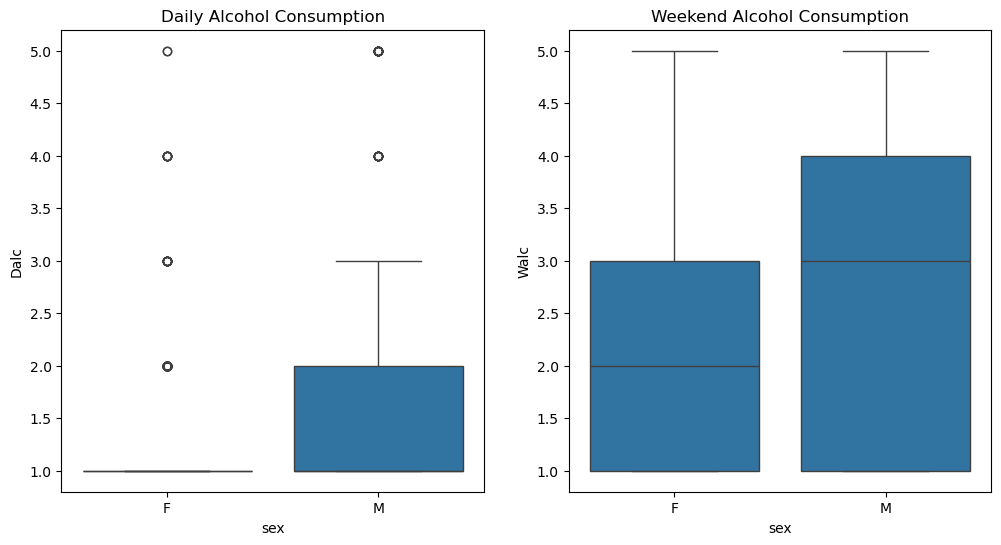

In [191]:
# 3
# 성별에 따라 포르투갈어 기말고사 점수의 차이가 진짜 있는 것인지
# 아니면 성별에 따라 다른 변수의 값의 분포가 달라 그렇게 관측이 된 것인지
# 확실하지 않습니다.

# ChatGPT를 이용해 csv파일의 컬럼들의 의미를 파악하였고, 음주에 관련된 변수인
# Dalc과 Walc이 있다는 것을 알게 되었습니다.
# 직관적으로 생각했을 때, 성별보다는 음주빈도에 따라 성적 변동이 있을 것으로 생각되어
# 성별에 따라 음주빈도가 다른지 boxplot을 그려 시각적으로 확인했습니다.
import seaborn as sns

data=pd.read_csv('student-por.csv')
fig,axes=plt.subplots(1,2,figsize=(12, 6))
sns.boxplot(x=data['sex'], y=data['Dalc'], ax=axes[0])
axes[0].set_title('Daily Alcohol Consumption')
sns.boxplot(x=data['sex'], y=data['Walc'], ax=axes[1])
axes[1].set_title('Weekend Alcohol Consumption')

print('시각적으로 분포의 차이가 있는 것으로 보입니다.')

In [5]:
# 따라서 rank-sum test에서 성별에 따라 포르투갈어 기말고사 성적이 차이가 난다고 보여진 것은
# 성별이 독립적인 요인이 되어 기말고사 성적에 영향을 미쳤다고 보는 것이 좋지 않습니다.
#
# 실제로 음주빈도만이 독립적인 요인으로 기말고사 성적에 영향을 미친다고해도
# 성별별 음주빈도가 다르므로, 성별이 기말고사 성적에 영향을 미친다고 오인할 수 있습니다.